In [ ]:
# prob 1

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

#np.set_printoptions(precision=4)
#np.set_printoptions(suppress=True)

In [2]:
# Load the data (in .mat format)
from scipy.io import loadmat
data = loadmat('teacher_data/hw4_data.mat')
# loadmat returns a dictionary of the data

# Training set
Xtr = data['X']
ytr = data['y']

# Validation set
Xcv = data['Xval']
ycv = data['yval']

# Test set
Xtest = data['Xtest']
ytest = data['ytest']

print(Xtr.shape, ytr.shape)
print(Xcv.shape, ycv.shape)
print(Xtest.shape, ytest.shape)

(12, 1) (12, 1)
(21, 1) (21, 1)
(21, 1) (21, 1)


In [3]:
def plotScatter(x,y,title,y_title,x_title):
    plt.scatter(x, y, c = 'green')
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.grid(True)

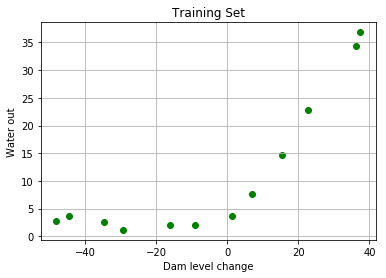

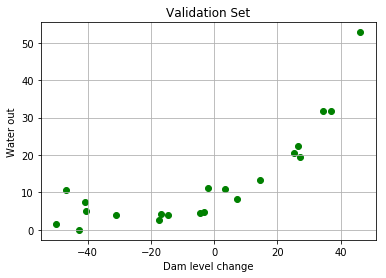

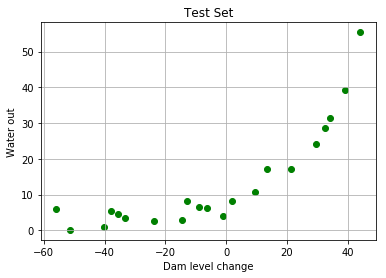

In [4]:
plotScatter(Xtr,ytr,'Training Set','Water out','Dam level change')
plt.show()
plotScatter(Xcv,ycv,'Validation Set','Water out','Dam level change')
plt.show()
plotScatter(Xtest,ytest,'Test Set','Water out','Dam level change')
plt.show()

In [37]:
# function to compute h(x)
def h(X, theta):
    return X * theta.T

# function to compute the cost of the entire set as (1/2m) SUM((X·theta'-y)^2) + regularization
def computeCost(theta, X, y, lmbda):
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.asarray(y)
    m = len(y)
    
    cost = (np.sum(np.square(h(X, theta) - y)) + lmbda * np.sum(np.square(theta))) / (2*m)
    return(cost)

In [53]:
# function that computes the gradient for each theta parameter (single step, not the gradient algorithm)
def computeGradient(theta, X, y, lmbda):
    o_theta = theta
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.asarray(y)
    m = len(y)
    p = X.shape[1]
    term1 = h(X, theta) - y
    
    grad = []
    for i in range(p):
        if i == 0:
            cur_X = X[:,i]
            cur_grad = np.sum(np.multiply(term1, cur_X)) / m 
            grad.append(cur_grad)
        else:
            cur_X = X[:,i]
            cur_grad = np.sum((np.multiply(term1, cur_X) / m)) + ((lmbda/m) * o_theta[i])
            grad.append(cur_grad)
    
    return np.array(grad)
    

In [7]:
# insert 'ones' column in X matrices
Xtr   = np.insert(Xtr  ,0,1,axis=1)
Xcv   = np.insert(Xcv  ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
print(Xtr.shape, ytr.shape)
print(Xcv.shape, ycv.shape)
print(Xtest.shape, ytest.shape)

(12, 2) (12, 1)
(21, 2) (21, 1)
(21, 2) (21, 1)


In [8]:
# set theta starting values (theta0, theta1) initilaized to (0,0)
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)
print(thetaStart.shape)

(2,)


In [39]:
# Compute the cost with thetaStart = (0,0) (should be around 140.95...)
computeCost(thetaStart, Xtr, ytr, 0)

140.95412088055392

In [54]:
# something wrong
# Compute the gradient with thetaStart = (0,0) (should be around [-11.21..., -245.65...)
computeGradient(thetaStart, Xtr, ytr, 0)

array([ -11.21758933, -245.65199649])

In [55]:
from scipy import optimize

# just a helper function to call scipy fmin optimzation function
def optimizeTheta(X, y, theta, lmbda):
    # using fmin_tnc (we need to pass gradient)
    result = optimize.fmin_tnc(func=computeCost, 
                               x0=theta, 
                               args=(X, y, lmbda), 
                               fprime=computeGradient)
    return result[0], computeCost(result[0], X, y, lmbda)   
    
    # using minimize (no need to pass gradient)
    #result = optimize.minimize(computeCost, theta, args=(X, y, lmbda),  method='BFGS', options={"maxiter":500, "disp":False} )
    #return result.x, result.fun

In [56]:
# And optimize!
thetaFinal, minCost = optimizeTheta(Xtr, ytr, thetaStart, 0)
print(thetaFinal, minCost)

[13.08790351  0.36777923] 22.373906495108915


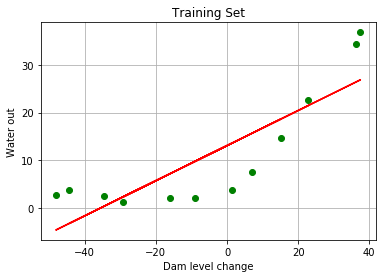

In [128]:
plotScatter(Xtr[:,1],ytr,'Training Set','Water out','Dam level change')
plt.plot(Xtr[:,1], thetaFinal[0] + thetaFinal[1]*Xtr[:,1], 'r-')

In [ ]:
# prob 1 finished

In [ ]:
# prob 2

In [75]:
# set a theatStart initialized to zeros
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)
# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 0

# init arrays to store output data for later plotting
m_values, j_tr, j_cv = [], [], []

# loop over training subsets of different sizes (1:1,1:2,1:3,...)

computeCost(thetaStart, Xtr, ytr, 0)
thetaFinal, minCost = optimizeTheta(Xtr, ytr, thetaStart, 0)

theta = thetaStart
for m in range(1, Xtr.shape[0]+1, 1):
    # Problem 2.1: write your code here
    m_values.append(m)   
    
    cur_X_tr = Xtr[0:m,:]
    cur_y_tr = ytr[0:m]
    
    theta, minCost = optimizeTheta(cur_X_tr, cur_y_tr, thetaStart, 0)
    cur_j_tr = computeCost(theta, cur_X_tr, cur_y_tr, 0)
    cur_j_cv = computeCost(theta, Xcv, ycv, 0)
    
    j_tr.append(cur_j_tr)
    j_cv.append(cur_j_cv)

# check sizes
print(len(m_values), len(j_tr), len(j_cv))

12 12 12


In [76]:
# function that plots the learning curve
def plotLearningCurve(m_values,j_tr,j_cv,title,x_title,y_title):
    plt.figure(figsize=(6,4))
    plt.plot(m_values, j_tr, 'g-', label='Training')
    plt.plot(m_values, j_cv, 'r-', label='Validation')
    plt.grid(True)
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.legend()
    plt.show()

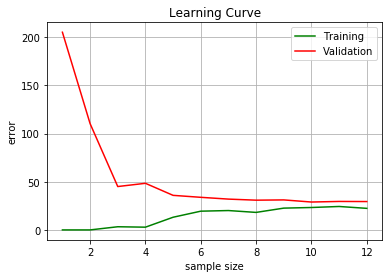

In [77]:
plotLearningCurve(m_values, j_tr, j_cv,'Learning Curve', 'sample size','error')

In [ ]:
# prob 2 finished

In [85]:
# prob 3

In [91]:
def generatePolynomialFeatures(X, p):
    X = np.asarray(X[:,1:])
    for i in range(1, p+1, 1):
        temp_x = np.power(X, i)
        
        if i == 1 :
            out = temp_x
        else:
            out = np.column_stack((out,temp_x))
            
    out = np.insert(out ,0,1,axis=1)
    return out

In [67]:
# function that normalizes a data set (x-mu/sigma)
def normalizeFeatures(X):
    
    Xnorm = X.copy()
    
    # compute means and standdard deviations (column-wise)
    means = np.mean(Xnorm,axis=0)
    std_devs = np.std(Xnorm,axis=0,ddof=1)
    
    # compute normalization
    Xnorm[:,1:] = ( Xnorm[:,1:] - means[1:] ) / std_devs[1:]
        
    return Xnorm, means, std_devs

In [68]:
# function that plots the polynomial regression line on top of the scatter data plot
def plotPolynomialFit(theta, original_means, original_std_devs):
    
    # create linear space to plot
    points_to_plot = 50
    x_values = np.linspace(-60, 60, points_to_plot)

    # construct 'fake' x matrix (representing all the points to plot) to compute h(x)
    x_mat = np.ones((points_to_plot,1))
    x_mat = np.insert(x_mat, x_mat.shape[1], x_values.T, axis=1)
    x_mat = generatePolynomialFeatures(x_mat, len(theta)-1)
 
    # normalize using original means and std_devs
    x_mat[:,1:] = x_mat[:,1:] - original_means[1:]
    x_mat[:,1:] = x_mat[:,1:] / original_std_devs[1:]
    
    # convert to matrices to use notation of algebra operations
    theta = np.matrix(theta)
    x_mat = np.matrix(x_mat)
    
    # plot regression line
    plt.plot(x_values, h(x_mat, theta), 'r-')

In [100]:
points_to_plot = 50
x_values = np.linspace(-60, 60, points_to_plot)
x_values

array([-60.        , -57.55102041, -55.10204082, -52.65306122,
       -50.20408163, -47.75510204, -45.30612245, -42.85714286,
       -40.40816327, -37.95918367, -35.51020408, -33.06122449,
       -30.6122449 , -28.16326531, -25.71428571, -23.26530612,
       -20.81632653, -18.36734694, -15.91836735, -13.46938776,
       -11.02040816,  -8.57142857,  -6.12244898,  -3.67346939,
        -1.2244898 ,   1.2244898 ,   3.67346939,   6.12244898,
         8.57142857,  11.02040816,  13.46938776,  15.91836735,
        18.36734694,  20.81632653,  23.26530612,  25.71428571,
        28.16326531,  30.6122449 ,  33.06122449,  35.51020408,
        37.95918367,  40.40816327,  42.85714286,  45.30612245,
        47.75510204,  50.20408163,  52.65306122,  55.10204082,
        57.55102041,  60.        ])

In [69]:
# function that creates the normalized polynomial features
def createPolynomialFeaturesAndTrain(X, y, poly_degree, lmbda):
    X = generatePolynomialFeatures(X, poly_degree)
    Xnorm, means, std_devs = normalizeFeatures(X)
    theta = np.zeros(X.shape[1], dtype=np.float)
    
    thetaFinal, minCost = optimizeTheta(Xnorm, y, theta, lmbda)
    
    return Xnorm, means, std_devs, thetaFinal
    

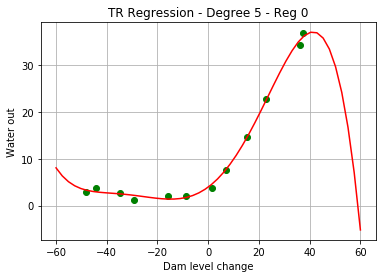

In [70]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 0

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# plot scatter data and regression line
plotScatter(Xtr[:,1], ytr, 'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Water out', 'Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)

In [71]:
# function that fits for different sample sizes and plots the learning curves
def PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xcv, ycv, poly_degree, lmbda):

    # set a theatStart initialized to zeros
    thetaStart = np.zeros(Xtr_poly.shape[1], dtype=np.float)

    # create the normalized polynomial features up to poly_degree of the validation set
    Xcv_poly = generatePolynomialFeatures(Xcv, poly_degree)
    Xcv_poly, original_means_cv, original_std_devs_cv = normalizeFeatures(Xcv_poly)

    # init arrays to store output data for later plotting
    m_values, j_tr, j_cv = [], [], []

    # loop over training subsets of different sizes (1:1,1:2,1:3,...)
    for m in range(1,Xtr_poly.shape[0]+1, 1):

        m_values.append(m)

        # train the subset and get theta that fits the given subset
        theta_subset, cost_subset = optimizeTheta(Xtr_poly[:m,:], ytr[:m], thetaStart, lmbda)

        # compute cost of the training subset (no regularization)
        j_tr.append(computeCost(theta_subset, Xtr_poly[:m,:], ytr[:m], 0))

        # compute cost of the validation(cv) subset (all samples in validation, not 1:m)(no regularization)
        j_cv.append(computeCost(theta_subset, Xcv_poly, ycv, 0))

    # check sizes
    print(len(m_values), len(j_tr), len(j_cv))

    # last cost value
    print(j_tr[-1], j_cv[-1])

    # plot the learning curves
    plotLearningCurve(m_values, j_tr, j_cv, 'Learning curves - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'sample size', 'error')


12 12 12
0.20849614692640928 14.521674246175085


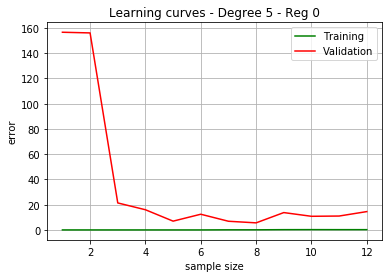

In [92]:
# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xcv, ycv, poly_degree=5, lmbda=0)

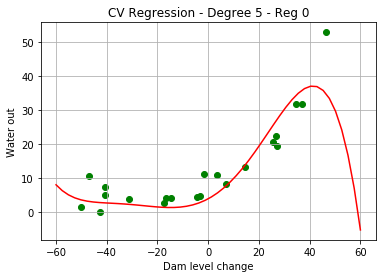

In [73]:
# plot validation scatter data and regression line
plotScatter(Xcv[:,1:],ycv,'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Water out','Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)

12 12 12
1.9483490341419112 4.627477749643819


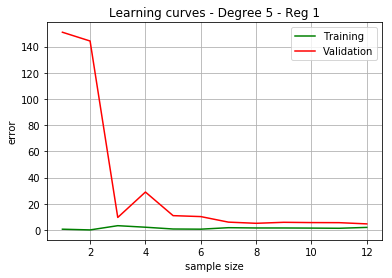

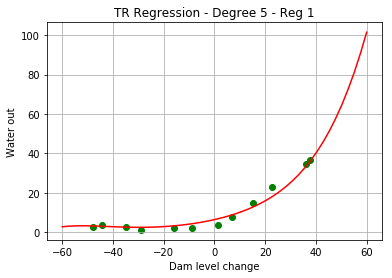

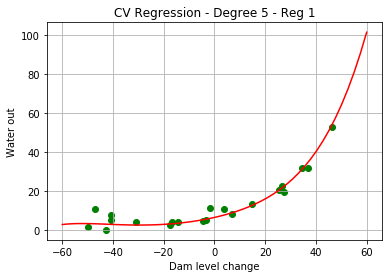

In [74]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 1

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xcv, ycv, poly_degree, lmbda)

# plot scatter data and regression line
plotScatter(Xtr[:,1], ytr, 'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Water out', 'Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)
plt.show()

# plot validation scatter data and regression line
plotScatter(Xcv[:,1:], ycv, 'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Water out', 'Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)

12 12 12
29.609952921162673 32.75401473722523


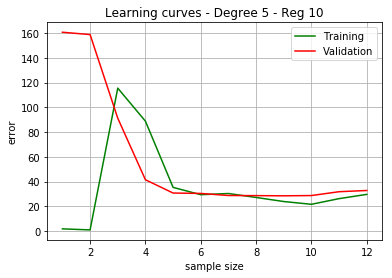

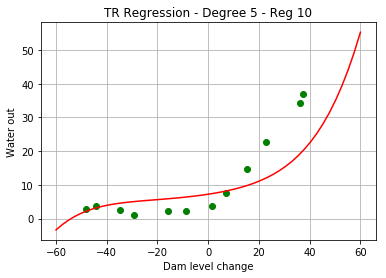

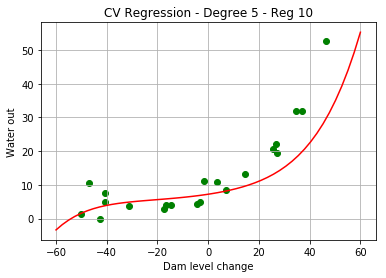

In [78]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 10

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xcv, ycv, poly_degree, lmbda)

# plot scatter data and regression line
plotScatter(Xtr[:,1],ytr,'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Water out','Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)
plt.show()
# plot validation scatter data and regression line
plotScatter(Xcv[:,1:],ycv,'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Water out','Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)

100 100 100
Minimum Jcv at lambda = 1.4141414141414141 => cost = 4.548448131007914


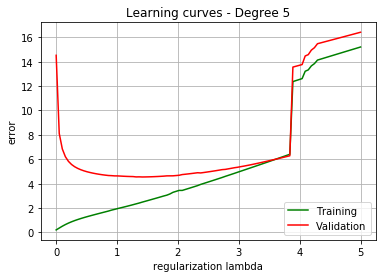

In [106]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# set all lmbda values to try
lmbdas = np.linspace(0, 5, 100)

# create the normalized polynomial features up to poly_degree of the validation set
Xcv_poly = generatePolynomialFeatures(Xcv,poly_degree)
Xcv_poly, original_means_cv, original_std_devs_cv = normalizeFeatures(Xcv_poly)

# init arrays to store output data for later plotting
lmbda_values, j_tr, j_cv = [], [], []

for lmbda in range(len(lmbdas)):
    lmbda_values.append(lmbdas[lmbda])
    Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbdas[lmbda])
    
    j_tr.append(computeCost(theta_final, Xtr_poly, ytr, 0))
    j_cv.append(computeCost(theta_final, Xcv_poly, ycv, 0))
    

# check sizes
print(len(lmbda_values), len(j_tr), len(j_cv))


# print lmbda with minimum j_cv
print('Minimum Jcv at lambda = ' + str(lmbda_values[j_cv.index(min(j_cv))]) + ' => cost = ' + str(min(j_cv)))

# plot the learning curves
plotLearningCurve(lmbda_values, j_tr, j_cv, 'Learning curves - Degree '+str(poly_degree), 'regularization lambda', 'error')

Final test cost => 16.387778527372838


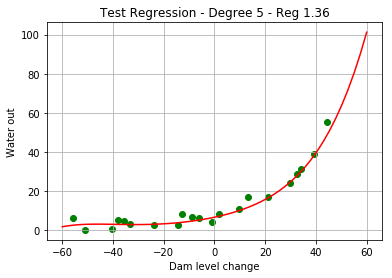

In [108]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter
lmbda = 1.36

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# create the normalized polynomial features up to poly_degree of the test set
# compute test cost
# Problem 3.5: write your code here

Xtest_poly = generatePolynomialFeatures(Xtest, poly_degree)
Xtest_poly, test_means, test_std_devs = normalizeFeatures(Xtest_poly)
j_test = computeCost(theta_final, Xtest_poly, ytest, lmbda)

print("Final test cost => " + str(j_test))

# plot scatter data and regression line
plotScatter(Xtest[:,1], ytest, 'Test Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Water out', 'Dam level change')
plotPolynomialFit(theta_final, original_means, original_std_devs)